# ICE 2
### Unsupervised mode

# Step 1: Import


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

sns.set(style="whitegrid")

# Step 2: Import Data and Preview Data


In [44]:
df = pd.read_csv("student_habits_performance.csv")

# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Count duplicates and nulls
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print(f"Number of null values: {df.isnull().sum().sum()}")


First 5 rows of the dataset:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Number of duplicate rows: 0
Number of null values: 91


# Step 3: Data Cleaning

In [45]:
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))


# Count duplicates and nulls
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print(f"Number of null values: {df.isnull().sum().sum()}")
# Show where nulls are
print("Null values per column:\n", df.isnull().sum())

# Depending on where our Null Values are we can determin wether filling them with the mean is the best way forward,
# removing them completely if the items are not useful or agrigating them, 
# in this case we drop the column becuase our main concern is the relashionship between score and time in school and studying



Number of duplicate rows: 0
Number of null values: 91
Null values per column:
 student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [46]:
#Dropping irrelevnt Data
df = df.drop(columns=["student_id"]) 
df = df.drop(columns=["parental_education_level"])
print("Null values per column:\n", df.isnull().sum())

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

Null values per column:
 age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


# Step 4: Visual Exploration

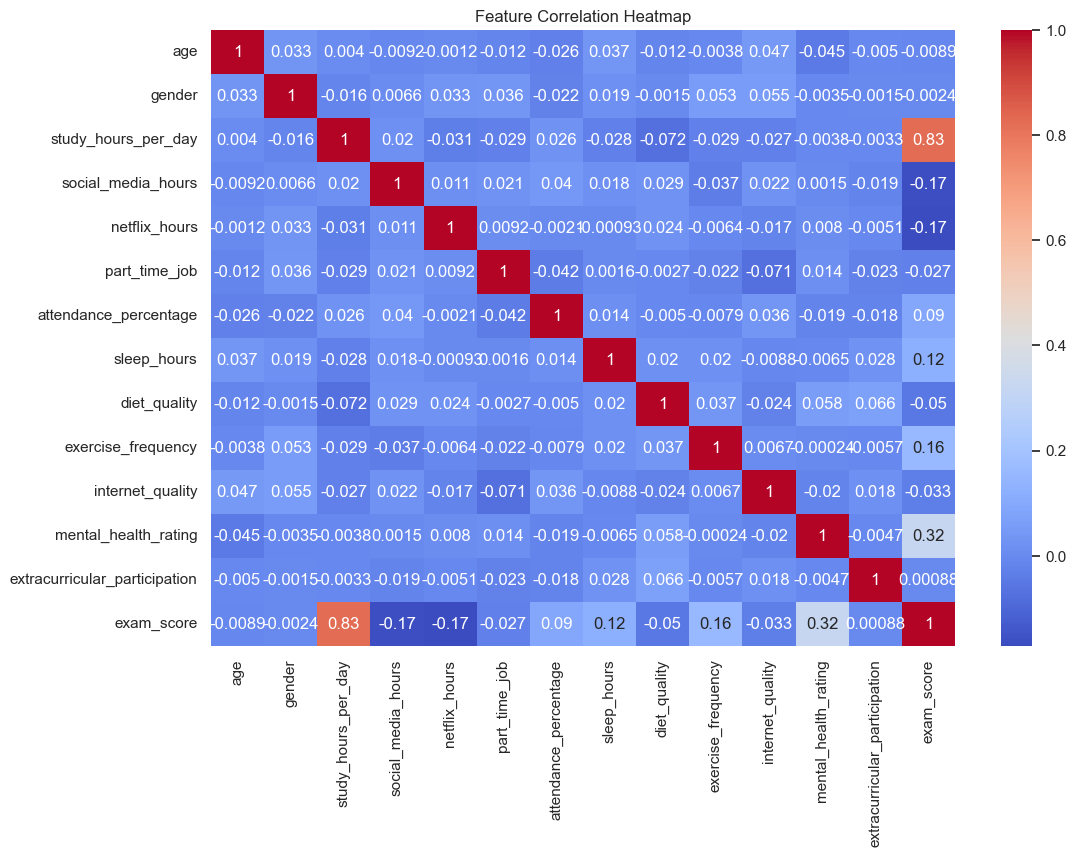

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# Step 5: K-Means Clustering

c:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

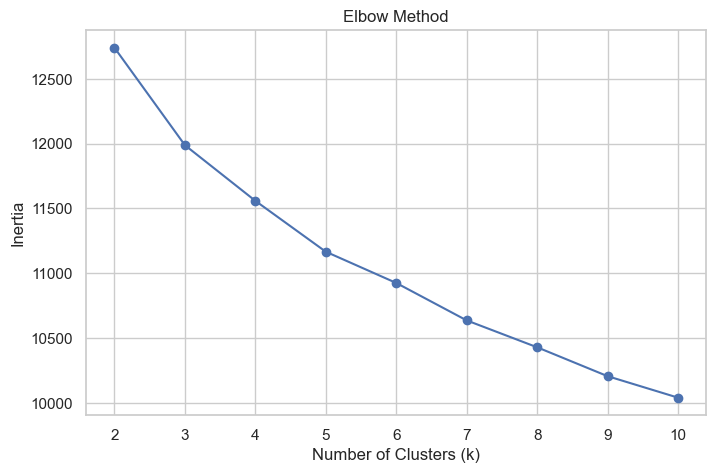

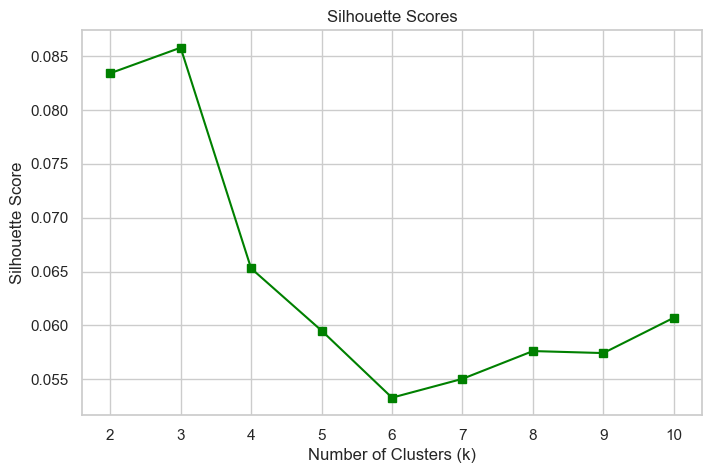

Best k based on Silhouette Score: 3


c:\tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [48]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Score Plot
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Best k from Silhouette Score
best_k = K[np.argmax(silhouette_scores)]
print(f"Best k based on Silhouette Score: {best_k}")

# Final KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

 # Step 6: DBSCAN Clustering

In [49]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Step 7: Dimensionality Reduction

In [50]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Step 8: Visualization Function

In [52]:
def plot_clusters(reduced_data, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='tab10')
    plt.title(title)
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# Step 9: Cluster Visualizations

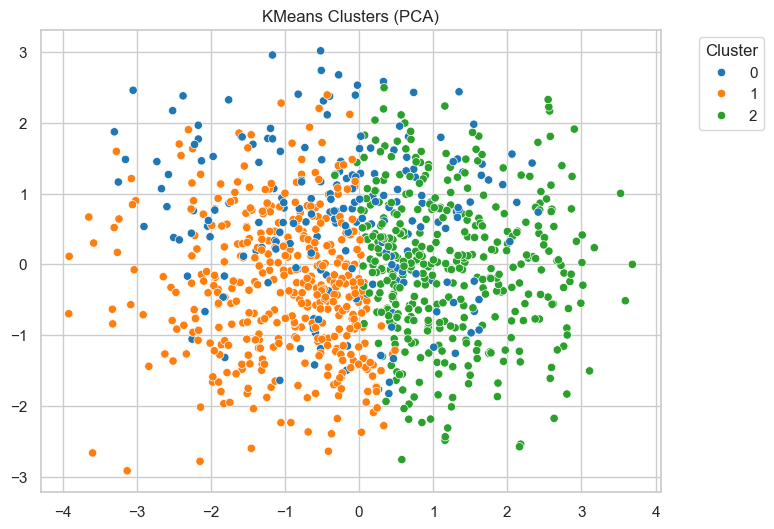

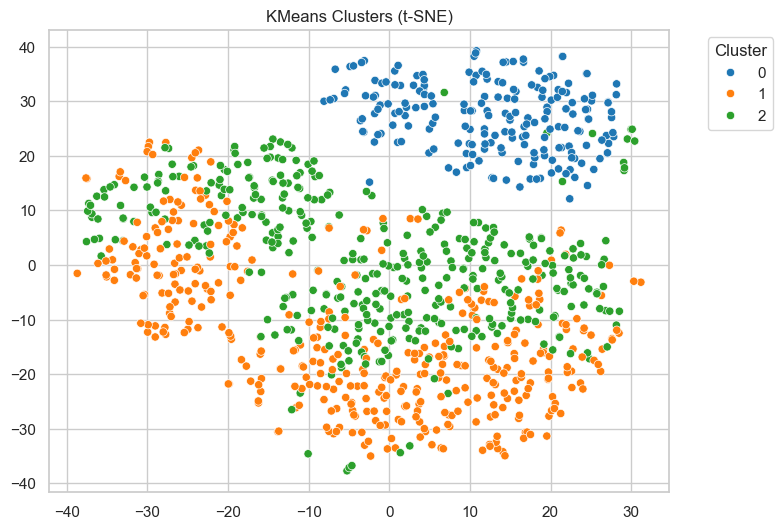

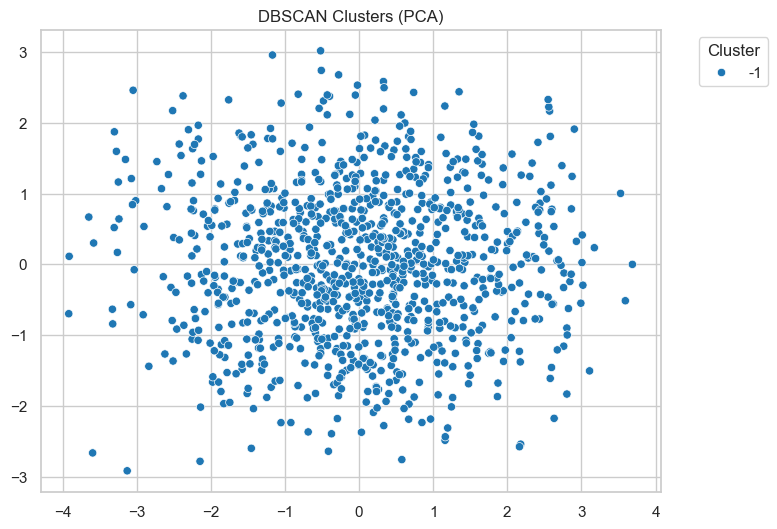

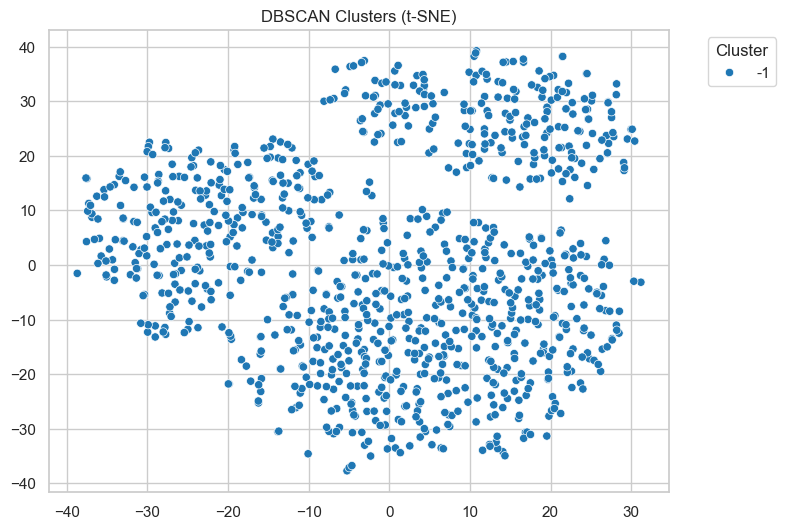

In [53]:
# KMeans
plot_clusters(pca_result, kmeans_labels, "KMeans Clusters (PCA)")
plot_clusters(tsne_result, kmeans_labels, "KMeans Clusters (t-SNE)")

# DBSCAN
plot_clusters(pca_result, dbscan_labels, "DBSCAN Clusters (PCA)")
plot_clusters(tsne_result, dbscan_labels, "DBSCAN Clusters (t-SNE)")